In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
data

NameError: name 'data' is not defined

In [2]:
import glob
data = pd.concat([pd.read_csv(f) for f in glob.glob('*.csv')])
print(data.columns)
data.dropna(inplace=True)
target = data.pop('flowrate')
#m = np.mean(target)
#v = np.var(target)
#target = target-m
#target = target/m
print(np.min(target))
data.pop('Unnamed: 0')
batch_size = 128
training_set_size = int(.2*len(data))
dataset = tf.data.Dataset.from_tensor_slices((data.values, target.values)).shuffle(len(data)).batch(batch_size, drop_remainder=True)
testset = dataset.take(training_set_size//batch_size)
trainset = dataset.skip(training_set_size//batch_size)
np.any(np.isnan(target))
len(data)



Index(['Unnamed: 0', 'Vx1', 'Vy1', 'Vz1', 'P1', 'P2', 'P3', 'P4', 'flowrate'], dtype='object')
48.61389565917072


53069

In [4]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import time


In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Use of this metric is not recommended; for illustration only. 
    See other regression metrics on sklearn docs:
      http://scikit-learn.org/stable/modules/classes.html#regression-metrics
    Use like any other metric
    >>> y_true = [3, -0.5, 2, 7]; y_pred = [2.5, -0.3, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    Out[]: 24.791666666666668
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
start_time = time.time()
svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("linear_svc", SVR(kernel='rbf', gamma='scale', coef0=.01, C=200))
])
a_train, a_test, b_train, b_test = train_test_split(data, target, test_size=0.2)
svm_clf.fit(a_train, b_train)
print(time.time()-start_time)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_percentage_error(b_test, svm_clf.predict(a_test)))

In [4]:
np.any(np.isnan(target))

False

In [3]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(1000),
tf.keras.layers.PReLU(),
tf.keras.layers.Dense(1000),
tf.keras.layers.PReLU(),
tf.keras.layers.Dense(1000),
tf.keras.layers.PReLU(),
tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
            loss='mse',
            metrics=['mape'])



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/1000
332/332 [==============================] - 2s 7ms/step - loss: 190914.2781 - mape: 21.3521 - val_loss: 0.0000e+00 - val_mape: 0.0000e+00 195662.793
Epoch 2/1000
332/332 [==============================] - 1s 3ms/step - loss: 92681.9334 - mape: 16.7266 - val_loss: 83485.7325 - val_mape: 15.3873
Epoch 3/1000
332/332 [==============================] - 1s 3ms/step - loss: 87982.4293 - mape: 16.3930 - val_loss: 86632.4570 - val_mape: 17.5198
Epoch 4/1000
332/332 [==============================] -

Epoch 52/1000
332/332 [==============================] - 1s 3ms/step - loss: 69681.7072 - mape: 14.2790 - val_loss: 63872.1929 - val_mape: 13.5876
Epoch 53/1000
332/332 [==============================] - 1s 3ms/step - loss: 69006.3765 - mape: 14.2355 - val_loss: 67355.3030 - val_mape: 14.7108
Epoch 54/1000
332/332 [==============================] - 1s 3ms/step - loss: 69917.6419 - mape: 14.2773 - val_loss: 67581.5830 - val_mape: 14.5937
Epoch 55/1000
332/332 [==============================] - 1s 3ms/step - loss: 69006.6458 - mape: 14.1833 - val_loss: 67284.7883 - val_mape: 14.1558
Epoch 56/1000
332/332 [==============================] - 1s 3ms/step - loss: 68614.6764 - mape: 14.1318 - val_loss: 65209.6445 - val_mape: 13.9176
Epoch 57/1000
332/332 [==============================] - 1s 3ms/step - loss: 67807.4270 - mape: 14.0943 - val_loss: 67595.0005 - val_mape: 14.5316
Epoch 58/1000
332/332 [==============================] - 1s 3ms/step - loss: 69454.6815 - mape: 14.2065 - val_loss: 65

332/332 [==============================] - 1s 3ms/step - loss: 54599.1665 - mape: 12.4494 - val_loss: 53353.4653 - val_mape: 12.1954
Epoch 108/1000
332/332 [==============================] - 1s 3ms/step - loss: 54342.4814 - mape: 12.3730 - val_loss: 52567.5515 - val_mape: 12.9929
Epoch 109/1000
332/332 [==============================] - 1s 3ms/step - loss: 53724.6847 - mape: 12.3073 - val_loss: 55681.1571 - val_mape: 11.4905
Epoch 110/1000
332/332 [==============================] - 1s 3ms/step - loss: 53187.3632 - mape: 12.2059 - val_loss: 50013.2806 - val_mape: 12.2389
Epoch 111/1000
332/332 [==============================] - 1s 3ms/step - loss: 52700.4783 - mape: 12.2046 - val_loss: 51614.9203 - val_mape: 12.1594
Epoch 112/1000
332/332 [==============================] - 1s 3ms/step - loss: 52556.3696 - mape: 12.1436 - val_loss: 53144.6169 - val_mape: 12.3074
Epoch 113/1000
332/332 [==============================] - 1s 3ms/step - loss: 52409.9162 - mape: 12.1381 - val_loss: 49385.1220

332/332 [==============================] - 1s 3ms/step - loss: 38917.3620 - mape: 10.3298 - val_loss: 38361.9435 - val_mape: 9.8688
Epoch 163/1000
332/332 [==============================] - 1s 3ms/step - loss: 39002.6317 - mape: 10.3648 - val_loss: 38988.6894 - val_mape: 10.4868
Epoch 164/1000
332/332 [==============================] - 1s 3ms/step - loss: 38263.5834 - mape: 10.2121 - val_loss: 36605.9032 - val_mape: 10.3240
Epoch 165/1000
332/332 [==============================] - 1s 3ms/step - loss: 37466.8204 - mape: 10.1020 - val_loss: 36567.6733 - val_mape: 9.8985
Epoch 166/1000
332/332 [==============================] - 1s 3ms/step - loss: 37509.1153 - mape: 10.1478 - val_loss: 36582.8152 - val_mape: 9.8042
Epoch 167/1000
332/332 [==============================] - 1s 3ms/step - loss: 36972.3907 - mape: 10.0704 - val_loss: 43711.1206 - val_mape: 10.1650
Epoch 168/1000
332/332 [==============================] - 1s 3ms/step - loss: 37617.9634 - mape: 10.1756 - val_loss: 34668.6537 - 

332/332 [==============================] - 1s 3ms/step - loss: 25827.8976 - mape: 8.4143 - val_loss: 25633.3299 - val_mape: 8.2388
Epoch 219/1000
332/332 [==============================] - 1s 3ms/step - loss: 24940.5367 - mape: 8.2080 - val_loss: 26858.7390 - val_mape: 8.5981
Epoch 220/1000
332/332 [==============================] - 1s 3ms/step - loss: 25113.5131 - mape: 8.3119 - val_loss: 24749.4377 - val_mape: 7.9997
Epoch 221/1000
332/332 [==============================] - 1s 3ms/step - loss: 24811.0523 - mape: 8.2365 - val_loss: 23212.5026 - val_mape: 7.8192
Epoch 222/1000
332/332 [==============================] - 1s 3ms/step - loss: 24295.8986 - mape: 8.1437 - val_loss: 22917.0550 - val_mape: 7.8326
Epoch 223/1000
332/332 [==============================] - 1s 3ms/step - loss: 24098.4073 - mape: 8.1497 - val_loss: 24533.0203 - val_mape: 7.8255
Epoch 224/1000
332/332 [==============================] - 1s 3ms/step - loss: 24587.9911 - mape: 8.2142 - val_loss: 23507.2579 - val_mape: 

332/332 [==============================] - 1s 3ms/step - loss: 15997.2788 - mape: 6.6824 - val_loss: 16303.9499 - val_mape: 6.7296
Epoch 275/1000
332/332 [==============================] - 1s 3ms/step - loss: 15926.7945 - mape: 6.6353 - val_loss: 15080.9951 - val_mape: 6.6185
Epoch 276/1000
332/332 [==============================] - 1s 3ms/step - loss: 15629.1409 - mape: 6.6161 - val_loss: 16557.5052 - val_mape: 6.6565
Epoch 277/1000
332/332 [==============================] - 1s 3ms/step - loss: 15710.5370 - mape: 6.6729 - val_loss: 13910.9178 - val_mape: 6.0870
Epoch 278/1000
332/332 [==============================] - 1s 3ms/step - loss: 15391.5050 - mape: 6.5653 - val_loss: 14238.8137 - val_mape: 6.1642
Epoch 279/1000
332/332 [==============================] - 1s 3ms/step - loss: 15113.7192 - mape: 6.4638 - val_loss: 14229.3057 - val_mape: 6.2958
Epoch 280/1000
332/332 [==============================] - 1s 3ms/step - loss: 15859.9701 - mape: 6.6636 - val_loss: 14429.2614 - val_mape: 

332/332 [==============================] - 1s 3ms/step - loss: 10317.1161 - mape: 5.4711 - val_loss: 10162.8570 - val_mape: 5.5352
Epoch 331/1000
332/332 [==============================] - 1s 3ms/step - loss: 10881.3366 - mape: 5.5627 - val_loss: 9870.3103 - val_mape: 5.3165
Epoch 332/1000
332/332 [==============================] - 1s 3ms/step - loss: 10465.0875 - mape: 5.4936 - val_loss: 9218.2053 - val_mape: 5.2669
Epoch 333/1000
332/332 [==============================] - 1s 3ms/step - loss: 10066.2384 - mape: 5.3791 - val_loss: 9733.5663 - val_mape: 5.2073
Epoch 334/1000
332/332 [==============================] - 1s 3ms/step - loss: 10212.7839 - mape: 5.4395 - val_loss: 8910.7864 - val_mape: 5.2558
Epoch 335/1000
332/332 [==============================] - 1s 3ms/step - loss: 9378.8657 - mape: 5.2340 - val_loss: 8674.9695 - val_mape: 5.0131
Epoch 336/1000
332/332 [==============================] - 1s 3ms/step - loss: 9159.1542 - mape: 5.1556 - val_loss: 9061.9836 - val_mape: 4.9534
E

Epoch 387/1000
332/332 [==============================] - 1s 3ms/step - loss: 6715.5964 - mape: 4.4762 - val_loss: 5987.4366 - val_mape: 4.2687
Epoch 388/1000
332/332 [==============================] - 1s 3ms/step - loss: 6540.4878 - mape: 4.4057 - val_loss: 6823.5882 - val_mape: 4.7117
Epoch 389/1000
332/332 [==============================] - 1s 3ms/step - loss: 6777.0133 - mape: 4.5142 - val_loss: 6412.4464 - val_mape: 4.3824
Epoch 390/1000
332/332 [==============================] - 1s 3ms/step - loss: 7285.6213 - mape: 4.6484 - val_loss: 8677.9170 - val_mape: 4.9975
Epoch 391/1000
332/332 [==============================] - 1s 3ms/step - loss: 7569.6676 - mape: 4.7270 - val_loss: 5893.7874 - val_mape: 4.1045
Epoch 392/1000
332/332 [==============================] - 1s 3ms/step - loss: 6472.6244 - mape: 4.4266 - val_loss: 5901.6210 - val_mape: 4.1512
Epoch 393/1000
332/332 [==============================] - 1s 3ms/step - loss: 6472.0976 - mape: 4.3969 - val_loss: 6409.1895 - val_mape:

Epoch 444/1000
332/332 [==============================] - 1s 3ms/step - loss: 5191.7371 - mape: 4.0047 - val_loss: 4866.6351 - val_mape: 3.7305
Epoch 445/1000
332/332 [==============================] - 1s 3ms/step - loss: 4943.8867 - mape: 3.8860 - val_loss: 7971.2645 - val_mape: 4.7513
Epoch 446/1000
332/332 [==============================] - 1s 3ms/step - loss: 5001.5717 - mape: 3.9009 - val_loss: 4432.9478 - val_mape: 3.6139
Epoch 447/1000
332/332 [==============================] - 1s 3ms/step - loss: 4766.6503 - mape: 3.8090 - val_loss: 4563.1996 - val_mape: 3.6525
Epoch 448/1000
332/332 [==============================] - 1s 3ms/step - loss: 5226.6278 - mape: 3.9821 - val_loss: 4777.5894 - val_mape: 3.8096
Epoch 449/1000
332/332 [==============================] - 1s 3ms/step - loss: 5520.2913 - mape: 4.0939 - val_loss: 5083.8115 - val_mape: 4.1041
Epoch 450/1000
332/332 [==============================] - 1s 3ms/step - loss: 5187.3588 - mape: 3.9739 - val_loss: 4932.0561 - val_mape:

Epoch 501/1000
332/332 [==============================] - 1s 3ms/step - loss: 3963.3960 - mape: 3.4913 - val_loss: 4134.4623 - val_mape: 3.6628
Epoch 502/1000
332/332 [==============================] - 1s 3ms/step - loss: 4222.3986 - mape: 3.5964 - val_loss: 4331.6598 - val_mape: 3.7711
Epoch 503/1000
332/332 [==============================] - 1s 3ms/step - loss: 4453.2617 - mape: 3.6947 - val_loss: 4582.7630 - val_mape: 3.6744
Epoch 504/1000
332/332 [==============================] - 1s 3ms/step - loss: 4325.7795 - mape: 3.6434 - val_loss: 4058.1780 - val_mape: 3.5513
Epoch 505/1000
332/332 [==============================] - 1s 3ms/step - loss: 3929.0569 - mape: 3.4846 - val_loss: 4707.9028 - val_mape: 3.8108
Epoch 506/1000
332/332 [==============================] - 1s 3ms/step - loss: 4039.2481 - mape: 3.5085 - val_loss: 3420.0427 - val_mape: 3.2248
Epoch 507/1000
332/332 [==============================] - 1s 3ms/step - loss: 3588.0148 - mape: 3.3102 - val_loss: 3899.4279 - val_mape:

Epoch 558/1000
332/332 [==============================] - 1s 3ms/step - loss: 3713.6571 - mape: 3.3626 - val_loss: 3477.1361 - val_mape: 3.2958
Epoch 559/1000
332/332 [==============================] - 1s 3ms/step - loss: 3628.0993 - mape: 3.3244 - val_loss: 3060.1105 - val_mape: 3.0578
Epoch 560/1000
332/332 [==============================] - 1s 3ms/step - loss: 3592.0457 - mape: 3.2987 - val_loss: 3333.9622 - val_mape: 3.2685
Epoch 561/1000
332/332 [==============================] - 1s 3ms/step - loss: 3486.2638 - mape: 3.2996 - val_loss: 3167.9952 - val_mape: 3.2029
Epoch 562/1000
332/332 [==============================] - 1s 3ms/step - loss: 3264.0259 - mape: 3.1650 - val_loss: 3189.2471 - val_mape: 3.0569
Epoch 563/1000
332/332 [==============================] - 1s 3ms/step - loss: 3472.0442 - mape: 3.2746 - val_loss: 3755.1731 - val_mape: 3.3681
Epoch 564/1000
332/332 [==============================] - 1s 3ms/step - loss: 3413.4659 - mape: 3.2391 - val_loss: 3344.6394 - val_mape:

Epoch 615/1000
332/332 [==============================] - 1s 3ms/step - loss: 2919.6768 - mape: 2.9999 - val_loss: 2458.7267 - val_mape: 2.6991
Epoch 616/1000
332/332 [==============================] - 1s 3ms/step - loss: 2723.2234 - mape: 2.9006 - val_loss: 2837.2862 - val_mape: 3.0602
Epoch 617/1000
332/332 [==============================] - 1s 3ms/step - loss: 3002.9492 - mape: 3.0150 - val_loss: 2989.3145 - val_mape: 3.0037
Epoch 618/1000
332/332 [==============================] - 1s 3ms/step - loss: 2977.0359 - mape: 3.0377 - val_loss: 2628.0501 - val_mape: 2.7961
Epoch 619/1000
332/332 [==============================] - 1s 3ms/step - loss: 3382.2765 - mape: 3.2249 - val_loss: 2908.9856 - val_mape: 2.9601
Epoch 620/1000
332/332 [==============================] - 1s 3ms/step - loss: 2959.4014 - mape: 3.0118 - val_loss: 2938.2771 - val_mape: 2.9544
Epoch 621/1000
332/332 [==============================] - 1s 3ms/step - loss: 3213.0713 - mape: 3.1259 - val_loss: 2624.6986 - val_mape:

Epoch 672/1000
332/332 [==============================] - 1s 3ms/step - loss: 2536.6358 - mape: 2.8028 - val_loss: 2335.3319 - val_mape: 2.6626
Epoch 673/1000
332/332 [==============================] - 1s 3ms/step - loss: 3081.2620 - mape: 3.0932 - val_loss: 2632.8041 - val_mape: 2.8071
Epoch 674/1000
332/332 [==============================] - 1s 3ms/step - loss: 2645.3590 - mape: 2.8552 - val_loss: 2905.6018 - val_mape: 2.9525
Epoch 675/1000
332/332 [==============================] - 1s 3ms/step - loss: 2731.5956 - mape: 2.9140 - val_loss: 2287.9560 - val_mape: 2.6803
Epoch 676/1000
332/332 [==============================] - 1s 3ms/step - loss: 2746.6230 - mape: 2.9092 - val_loss: 2882.1199 - val_mape: 2.9084
Epoch 677/1000
332/332 [==============================] - 1s 3ms/step - loss: 2789.2521 - mape: 2.9299 - val_loss: 2986.4770 - val_mape: 3.0054
Epoch 678/1000
332/332 [==============================] - 1s 3ms/step - loss: 2676.4500 - mape: 2.8622 - val_loss: 3180.4801 - val_mape:

Epoch 729/1000
332/332 [==============================] - 1s 3ms/step - loss: 2168.6619 - mape: 2.5977 - val_loss: 2813.7427 - val_mape: 3.0607
Epoch 730/1000
332/332 [==============================] - 1s 3ms/step - loss: 2593.5651 - mape: 2.8113 - val_loss: 2710.4745 - val_mape: 2.9636
Epoch 731/1000
332/332 [==============================] - 1s 3ms/step - loss: 2792.2039 - mape: 2.9071 - val_loss: 2630.2854 - val_mape: 2.8344
Epoch 732/1000
332/332 [==============================] - 1s 3ms/step - loss: 2244.6789 - mape: 2.6514 - val_loss: 2221.4584 - val_mape: 2.6726
Epoch 733/1000
332/332 [==============================] - 1s 3ms/step - loss: 2401.6407 - mape: 2.7113 - val_loss: 1985.2928 - val_mape: 2.4813
Epoch 734/1000
332/332 [==============================] - 1s 3ms/step - loss: 2280.2426 - mape: 2.6491 - val_loss: 2246.8904 - val_mape: 2.5714
Epoch 735/1000
332/332 [==============================] - 1s 3ms/step - loss: 2720.7941 - mape: 2.8741 - val_loss: 2253.7481 - val_mape:

Epoch 786/1000
332/332 [==============================] - 1s 3ms/step - loss: 2150.2769 - mape: 2.5814 - val_loss: 2124.7624 - val_mape: 2.5165
Epoch 787/1000
332/332 [==============================] - 1s 3ms/step - loss: 2401.4605 - mape: 2.7130 - val_loss: 2225.1089 - val_mape: 2.6766
Epoch 788/1000
332/332 [==============================] - 1s 3ms/step - loss: 2332.2286 - mape: 2.6734 - val_loss: 2123.3904 - val_mape: 2.5435
Epoch 789/1000
332/332 [==============================] - 1s 3ms/step - loss: 2515.6159 - mape: 2.7569 - val_loss: 2416.6491 - val_mape: 2.6944
Epoch 790/1000
332/332 [==============================] - 1s 3ms/step - loss: 2447.2493 - mape: 2.7564 - val_loss: 2185.9106 - val_mape: 2.6259
Epoch 791/1000
332/332 [==============================] - 1s 3ms/step - loss: 2333.1810 - mape: 2.6491 - val_loss: 2111.2090 - val_mape: 2.5101
Epoch 792/1000
332/332 [==============================] - 1s 3ms/step - loss: 2061.8088 - mape: 2.5267 - val_loss: 1823.4496 - val_mape:

Epoch 843/1000
332/332 [==============================] - 1s 3ms/step - loss: 1856.6142 - mape: 2.4030 - val_loss: 1887.6210 - val_mape: 2.4320
Epoch 844/1000
332/332 [==============================] - 1s 3ms/step - loss: 2103.9431 - mape: 2.5591 - val_loss: 1900.8953 - val_mape: 2.4243
Epoch 845/1000
332/332 [==============================] - 1s 3ms/step - loss: 2137.1781 - mape: 2.5773 - val_loss: 1842.1595 - val_mape: 2.3550
Epoch 846/1000
332/332 [==============================] - 1s 3ms/step - loss: 2250.8890 - mape: 2.6205 - val_loss: 2798.4205 - val_mape: 3.0167
Epoch 847/1000
332/332 [==============================] - 1s 3ms/step - loss: 2267.3812 - mape: 2.6475 - val_loss: 1919.5432 - val_mape: 2.4261
Epoch 848/1000
332/332 [==============================] - 1s 3ms/step - loss: 2007.4824 - mape: 2.4768 - val_loss: 2014.3768 - val_mape: 2.4070
Epoch 849/1000
332/332 [==============================] - 1s 3ms/step - loss: 2077.2593 - mape: 2.5221 - val_loss: 1793.3488 - val_mape:

Epoch 900/1000
332/332 [==============================] - 1s 3ms/step - loss: 1864.6795 - mape: 2.3872 - val_loss: 1635.1043 - val_mape: 2.2198
Epoch 901/1000
332/332 [==============================] - 1s 3ms/step - loss: 1758.2739 - mape: 2.3260 - val_loss: 1870.2955 - val_mape: 2.3811
Epoch 902/1000
332/332 [==============================] - 1s 3ms/step - loss: 1925.4064 - mape: 2.4440 - val_loss: 1810.0183 - val_mape: 2.3372
Epoch 903/1000
332/332 [==============================] - 1s 3ms/step - loss: 2181.3201 - mape: 2.5902 - val_loss: 2006.0924 - val_mape: 2.4870
Epoch 904/1000
332/332 [==============================] - 1s 3ms/step - loss: 2017.8483 - mape: 2.4831 - val_loss: 1700.5971 - val_mape: 2.3089
Epoch 905/1000
332/332 [==============================] - 1s 3ms/step - loss: 1826.1450 - mape: 2.3778 - val_loss: 1681.5767 - val_mape: 2.2552
Epoch 906/1000
332/332 [==============================] - 1s 3ms/step - loss: 1786.6259 - mape: 2.3572 - val_loss: 1679.4671 - val_mape:

Epoch 957/1000
332/332 [==============================] - 1s 3ms/step - loss: 1640.8359 - mape: 2.2369 - val_loss: 1322.7567 - val_mape: 2.0324
Epoch 958/1000
332/332 [==============================] - 1s 3ms/step - loss: 1538.2976 - mape: 2.1792 - val_loss: 1903.5829 - val_mape: 2.4771
Epoch 959/1000
332/332 [==============================] - 1s 3ms/step - loss: 1732.1984 - mape: 2.3097 - val_loss: 1733.1706 - val_mape: 2.2719
Epoch 960/1000
332/332 [==============================] - 1s 3ms/step - loss: 1836.0612 - mape: 2.3651 - val_loss: 1705.7151 - val_mape: 2.2523
Epoch 961/1000
332/332 [==============================] - 1s 3ms/step - loss: 1960.5529 - mape: 2.4358 - val_loss: 2074.8683 - val_mape: 2.4915
Epoch 962/1000
332/332 [==============================] - 1s 3ms/step - loss: 2096.4128 - mape: 2.5221 - val_loss: 2436.2228 - val_mape: 2.8229
Epoch 963/1000
332/332 [==============================] - 1s 3ms/step - loss: 1845.1716 - mape: 2.3684 - val_loss: 1645.5822 - val_mape:

<IPython.core.display.Javascript object>


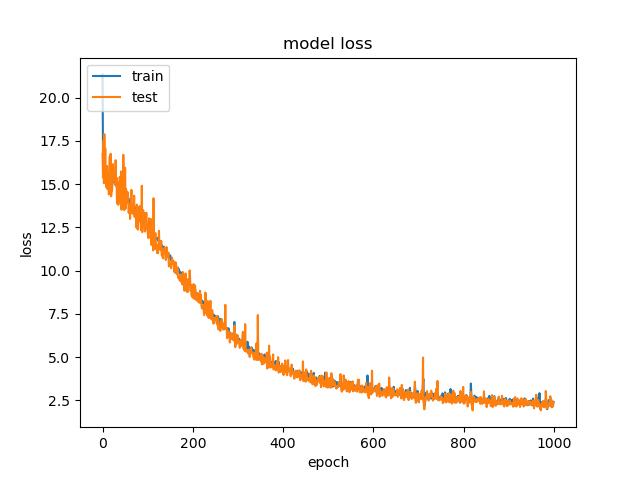

In [4]:

history = model.fit(trainset, validation_data=testset,epochs=1000)
# Visualize training history
import matplotlib.pyplot as plt
import numpy
%matplotlib notebook
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

for pred, true in zip(model.predict(data), target):
    print(pred[0]-true)

In [5]:
import glob
for f in [f for f in glob.glob('*.csv')]:
    print(f)
    data = pd.read_csv(f)
    data.dropna(inplace=True)
    data.pop('Unnamed: 0')
    target = data.pop('flowrate')
    batch_size = 128
    dataset = tf.data.Dataset.from_tensor_slices((data.values, target.values)).shuffle(len(data)).batch(batch_size, drop_remainder=True)
    model.evaluate(dataset)

se1.csv
69/69 [==============================] - 1s 10ms/step - loss: 1136.2150 - mape: 2.6090
se2.csv
68/68 [==============================] - 0s 2ms/step - loss: 3157.3049 - mape: 2.7293
sew1.csv
70/70 [==============================] - 0s 2ms/step - loss: 1629.1110 - mape: 2.1376
sew2.csv
67/67 [==============================] - 0s 2ms/step - loss: 2529.0906 - mape: 2.1240
sw1.csv
70/70 [==============================] - 0s 2ms/step - loss: 1473.4614 - mape: 2.3840
sw2.csv
68/68 [==============================] - 0s 2ms/step - loss: 1758.6688 - mape: 2.1747


In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              multiple                  800       
_________________________________________________________________
p_re_lu_6 (PReLU)            multiple                  100       
_________________________________________________________________
dense_9 (Dense)              multiple                  10100     
_________________________________________________________________
p_re_lu_7 (PReLU)            multiple                  100       
_________________________________________________________________
dense_10 (Dense)             multiple                  10100     
_________________________________________________________________
p_re_lu_8 (PReLU)            multiple                  100       
_________________________________________________________________
dense_11 (Dense)             multiple                 